In [ ]:
# !pip install imaplib
# !pip install langchain
# !pip install langchain_google_genai
# !pip install -U langchain-community
# !pip install langchain_huggingface
# !pip install langchain_community
# !pip install langchain_core
# !pip install faiss-cpu
# !pip install langgraph

In [ ]:
import getpass, imaplib, email
from datetime import datetime, timedelta
import email.utils
from email.header import decode_header
import smtplib
from email.mime.text import MIMEText
from langchain.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langgraph.graph import START,END, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display
from langgraph.types import Command
from typing import Annotated,TypedDict
from langgraph.graph.message import MessagesState
from typing import Literal
import random

In [ ]:
class State(MessagesState):
  result1 : list[str]
  result2 : str
  result3 : str
  result4 : str
  result5 : str
  result6 : str
  result7 : str
  to : str
  is_first_time : bool = True

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.7,
    api_key="Api Key")


In [ ]:
def embed():
    # Embedding model
    embeddings = HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2')
    return embeddings

i = 1
if i == 1:
    embeddings =  embed()
    i = i+1
else:
    print("embeddings already created")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
EMAIL = "hlatif487@gmail.com"
APP_PASSWORD = "sdns evwm sfoa uuhl"

num1 = []
data1 = []

# Connect to Gmail

def get_first_text_part(msg):
    if msg.is_multipart():
        for part in msg.walk():
            if part.get_content_type() == "text/plain" and part.get_content_disposition() in (None, "inline"):
                return part.get_payload(decode=True).decode(part.get_content_charset() or "utf-content", "replace")
        for part in msg.walk():                # fallback: HTML
            if part.get_content_type() == "text/html":
                return part.get_payload(decode=True).decode(part.get_content_charset() or "utf-content", "replace")
    else:
        return msg.get_payload(decode=True).decode(msg.get_content_charset() or "utf-content", "replace")
    return "[No readable body]"

# ==== READ EMAIL ====
def read_email(state:State):
  '''Read email from this code and call this function and then it return email data by fetching throuth gmail api'''
  M = imaplib.IMAP4_SSL("imap.gmail.com")
  M.login(EMAIL, APP_PASSWORD)
  M.select("inbox")
  typ, data = M.search(None, "ALL")
  email_ids = data[0].split()
  time_limit = datetime.utcnow() - timedelta(hours=24)
  result1 = []
  for eid in reversed(email_ids):  # Reversed to get recent emails first
      typ, msg_data = M.fetch(eid, "(RFC822)")
      if typ != 'OK':
        continue
      raw_email = msg_data[0][1]
      msg = email.message_from_bytes(raw_email)

      date_tuple = email.utils.parsedate_tz(msg["Date"])
      if date_tuple:
        email_time = datetime.utcfromtimestamp(email.utils.mktime_tz(date_tuple))

        # Compare time
        if email_time > time_limit:
            From = f"📧 Email from: {msg.get('From')}"
            email_time = f"📅 Date: {email_time}"
            subject = f"📌 Subject: {msg.get('Subject')}\n"
            Body_content = f"Body Content : {get_first_text_part(msg)}"
            print("\n\n")
            num1.append(eid)
            result1.append(f"{From}\n{email_time}\n{subject}\n{Body_content}")
            # print(f"{From}\n{email_time}\n{subject}\n{Body_content}")
        else:
            break
      else:
          print("Date not found in header")

  M.close()
  M.logout()
  print("Email read successfully.")
  result1 = ["I love to buy more product from you.","How your product help me?"]
  return {"result1":result1,"to":"hlatif4870@gmail.com"}


# ==== Check EMAIL is Empty====
def is_email_inbox_empty(state:State):

  print(f'Len of result1 is : {len(state["result1"])}')
  print(f'Len of result1 is : {state["result1"]}')

  is_first_time = state["is_first_time"]
  print(is_first_time)

  if is_first_time:
      print("✅ First time running — inserting empty string")
      data = [""] + state["result1"]
  else:
      data = state["result1"]

  if len(data) == 0:
    # Return a specific string key when the inbox is empty
    print("END GRAPH")
    return "end_graph"
  else:
    result2 = data.pop()
    print("is_email_inbox_empty")
    # Return the next node name as a string and update the state
    return {"result1": data, "result2": result2,"is_first_time" : False}

def skip_unrelated_email(state:State):
  return state

# ==== CATEGORIZE EMAIL====
def categorize_email(state:State):
  # email_data = state["result2"]
  # email_data = llm.invoke(f"if email is related to my bussinuss then anwser only in product_related,and if not related then only in unrelated, do not give any any other word {email_data}")
  # list1 = ["product_related","email_writer","unrelated"]
  # email_data = random.choice(list1)
  email_data = "product_related"
  print("categorize_email")
  # Return a string representing the next node
  # if email_data == "unrelated":
  #   return "skip_unrelated_email"
  # elif email_data == "product_related":
  #   return "construct_rag_query"
  # elif email_data == "email_writer":
  #   return "email_writer"
  # else:
  #   print("Categorized Error Occur")
  #   return "skip_unrelated_email" # Default or error handling


# ==== BUILD RAG QUERY FOR PRODUCT EMAIL ====
def construct_rag_query(state:State):
    """
    Extracts a relevant question/query from a product-related email
    for use in Retrieval-Augmented Generation (RAG).
    Parameters:
    - email_text: str - The raw text of the product-related email.
    Returns:
    - A string query suitable for searching a product knowledge base.
    """
    prompt = f"""
    This is a customer email. Extract the main intent or question about a product
    that can be used to search a knowledge base.
    Email:
    \"\"\"
    {state["result2"]}
    \"\"\"
    Just return the query in one line. Don't add extra text.
    """
    print("prompt")

    # LLM generates the actual query to be used for retrieval
    query = llm.invoke(prompt)
    print("construct_rag_query")
    return {"result3":query}

# ==== RETRIEVE FROM RAG ====
def database():
  with open("/content/agency.txt", "r") as f:
    agency = f.read()
  splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
  chunks = splitter.create_documents([agency])
  return FAISS.from_documents(chunks, embeddings)
  # print("Vector store created successfully.")
  # return vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

db = database()

def retrieve_from_rag(state:State):
    """
    Retrieves relevant context from vector store based on the query.

    Parameters:
    - query (str): The user/product query.
    - k (int): Number of top documents to retrieve.

    Returns:
    - List of strings (retrieved document contents).
    """
    print("Before ")

    results = db.similarity_search(state["result3"].content, k=3)
    result4 = [doc.page_content for doc in results]
    print("retrieve_from_rag")
    return {"result4":result4}

# ==== EMAIL WRITER ====
def email_writer(state:State):
    """
    Generates a reply email using retrieved knowledge and the original question.

    Parameters:
    - context_docs (List[str]): Relevant documents retrieved from the vector store.
    - query (str): The user's original product-related question extracted from the email.

    Returns:
    - reply (str): A drafted email response.
    """
    context_text = "\n\n".join(state["result4"])

    prompt = f"""
    You are a helpful support assistant for a tech product company.

    A customer sent this question:
    "{state["result3"]}"

    Based on the following product documentation:
    \"\"\"
    {context_text}
    \"\"\"

    Write a clear, friendly, and complete email reply addressing the customer's issue.
    Start with a greeting and avoid technical jargon if possible.
    """

    reply = llm.invoke(prompt)
    print("email_writer")
    return {"result5":reply}

# ==== EMAIL PROOFREADER ====
def email_proofreader(state:State):
    """
    Improves the email draft by correcting grammar, simplifying language,
    and ensuring a professional tone.

    Parameters:
    - draft (str): The raw email draft generated by email_writer.

    Returns:
    - proofed_email (str): A clean, customer-ready email response.
    """
    prompt = f"""
    You are an expert email proofreader.

    Please review the following email draft, correct any grammar/spelling issues,
    improve clarity, and make it sound professional yet friendly.

    Draft:
    \"\"\"
    {state["result5"]}
    \"\"\"
    And
    Question:
    {state["result3"]}

    if anwser not related to question then just return "You can write email once time more"

    Return only the improved version.
    """

    proofed_email = llm.invoke(prompt)
    print("email_proofreader")
    return {"result6":str(proofed_email)}


# ==== SEND EMAIL ====
def send_email(state:State):
    '''
    Sends a plain text email using your Gmail account.

    Parameters:
    - to: Email address of the receiver.
    - subject: Subject of the email.
    - body: Main message of the email.

    Example:
    send_email("user@example.com", "Hello", "This is a test email.")
    '''
    msg = MIMEText(state["result6"])
    msg["From"] = EMAIL
    msg["To"] = "hamzalatif8787@gmail.com"   #state["to"]
    msg["Subject"] = "I AM NEW HAMZA"

    with smtplib.SMTP_SSL("smtp.gmail.com", 465) as server:
        server.login(EMAIL, APP_PASSWORD)
        server.send_message(msg)
        print(f"✅ Email sent to {state['to']}")

    return {"result7":"is_email_inbox_empty"}
        # print(f"✅ Email sent to {state["to"]}")

In [ ]:
def cat(state:State):
  if len(state["result1"]) == 0:
    return "end_graph"
  else:
    return "process"
  pass

def cate(state:State):
  email_data = "product_related"
  print("categorize_email")
  # Return a string representing the next node
  if email_data == "unrelated":
    return "skip_unrelated"
  elif email_data == "product_related":
    return "product_related"
  elif email_data == "not product_related":
    return "not product_related"
  else:
    print("Categorized Error Occur")
    return "skip_unrelated_email" # Default or error handling

In [ ]:
builder = StateGraph(State)

builder.add_node("read_email",read_email)
builder.add_node("skip_unrelated_email",skip_unrelated_email)
builder.add_node("is_email_inbox_empty",is_email_inbox_empty)
builder.add_node("categorize_email",categorize_email)
builder.add_node("construct_rag_query",construct_rag_query)
builder.add_node("retrieve_from_rag",retrieve_from_rag)
builder.add_node("email_writer",email_writer)
builder.add_node("email_proofreader",email_proofreader)
builder.add_node("send_email",send_email)

In [ ]:
builder.add_edge(START,"read_email")
builder.add_edge("read_email","is_email_inbox_empty")
builder.add_conditional_edges("is_email_inbox_empty",cat,{
    "end_graph":END,
    "process":"categorize_email"
})
builder.add_conditional_edges("categorize_email",cate,{
    "product_related":"construct_rag_query",
    "skip_unrelated":"skip_unrelated_email",
    "not product_related":"email_writer"
})
builder.add_edge("construct_rag_query","retrieve_from_rag")
builder.add_edge("retrieve_from_rag","email_writer")
builder.add_edge("email_writer","email_proofreader")

builder.add_edge("skip_unrelated_email","is_email_inbox_empty")
builder.add_edge("email_proofreader","send_email")
builder.add_edge("send_email","is_email_inbox_empty")

In [ ]:
graph = builder.compile()

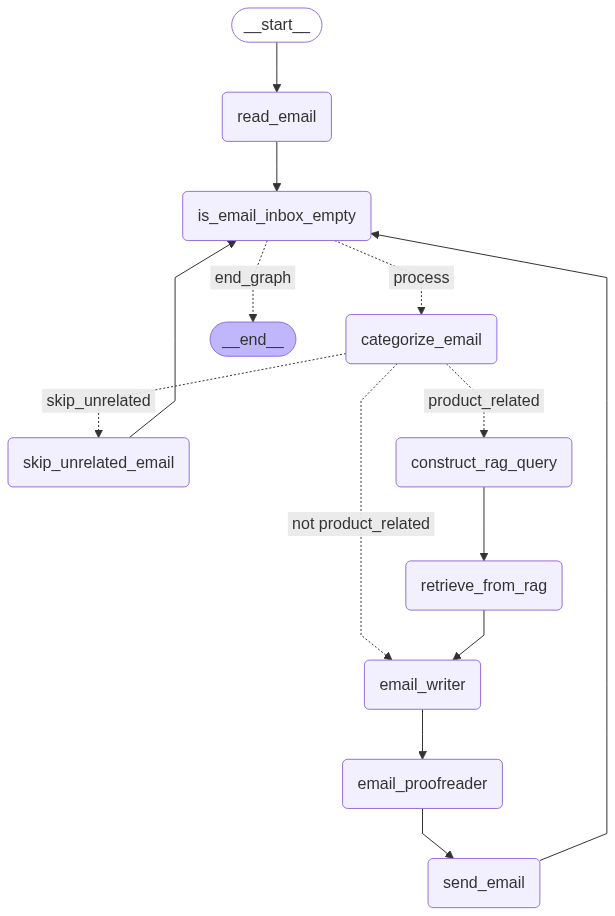

In [ ]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"is_first_time":True })
# ,{"recursion_limit": 100})



















Email read successfully.
Len of result1 is : 2
Len of result1 is : ['I love to buy more product from you.', 'How your product help me?']
True
✅ First time running — inserting empty string
is_email_inbox_empty
categorize_email
categorize_email
prompt
construct_rag_query
Before 
retrieve_from_rag
email_writer
email_proofreader
✅ Email sent to hlatif4870@gmail.com
Len of result1 is : 2
Len of result1 is : ['', 'I love to buy more product from you.']
False
is_email_inbox_empty
categorize_email
categorize_email
prompt
construct_rag_query
Before 
retrieve_from_rag
email_writer
email_proofreader
✅ Email sent to hlatif4870@gmail.com
Len of result1 is : 1
Len of result1 is : ['']
False
is_email_inbox_empty


In [ ]:
result["result2"]

'I love to buy more product from you.'

In [3]:
!git init

Initialized empty Git repository in D:/AI/Raff/.git/


In [4]:
!git clone https://github.com/HamzaLatif7465/Email_Assistance.git

Cloning into 'Email_Assistance'...
